In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv(r"..\\Data\\india_data\\niftynext50_data.csv")
df["Date"] = pd.to_datetime(df["Date"], dayfirst=True)
df.sort_values("Date", inplace=True)
df.head(5)

,Index Name,Date,PE,PB,Div Yield,Close,Earnings
6513,NIFTY NEXT 50,1999-01-01,12.12,1.98,1.77,1530.10,126.25
6512,NIFTY NEXT 50,1999-01-04,12.26,2.01,1.74,1552.50,126.63
6511,NIFTY NEXT 50,1999-01-05,12.41,2.03,1.72,1570.90,126.58
6510,NIFTY NEXT 50,1999-01-06,12.57,2.06,1.70,1590.95,126.57
6509,NIFTY NEXT 50,1999-01-07,12.69,2.08,1.69,1606.80,126.62


In [4]:
df.shape

(6514, 7)

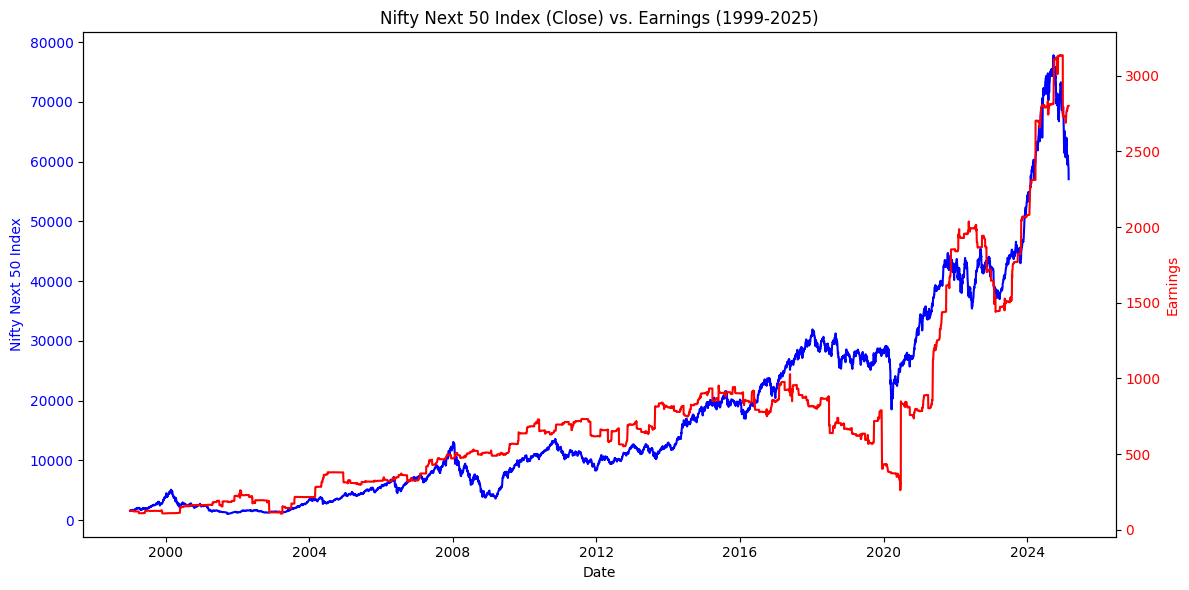

In [3]:
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(df["Date"], df["Close"], color="blue", label="Nifty Next 50 Index")
ax1.set_xlabel("Date")
ax1.set_ylabel("Nifty Next 50 Index", color="blue")
ax1.tick_params(axis="y", labelcolor="blue")

ax2 = ax1.twinx()
ax2.plot(df["Date"], df["Earnings"], color="red", label="Earnings")
ax2.set_ylabel("Earnings", color="red")
ax2.tick_params(axis="y", labelcolor="red")

plt.title("Nifty Next 50 Index (Close) vs. Earnings (1999-2025)")
fig.tight_layout()
plt.show()

In [5]:
correlation = df["Close"].corr(df["Earnings"])
print(correlation)

0.9339859986436806


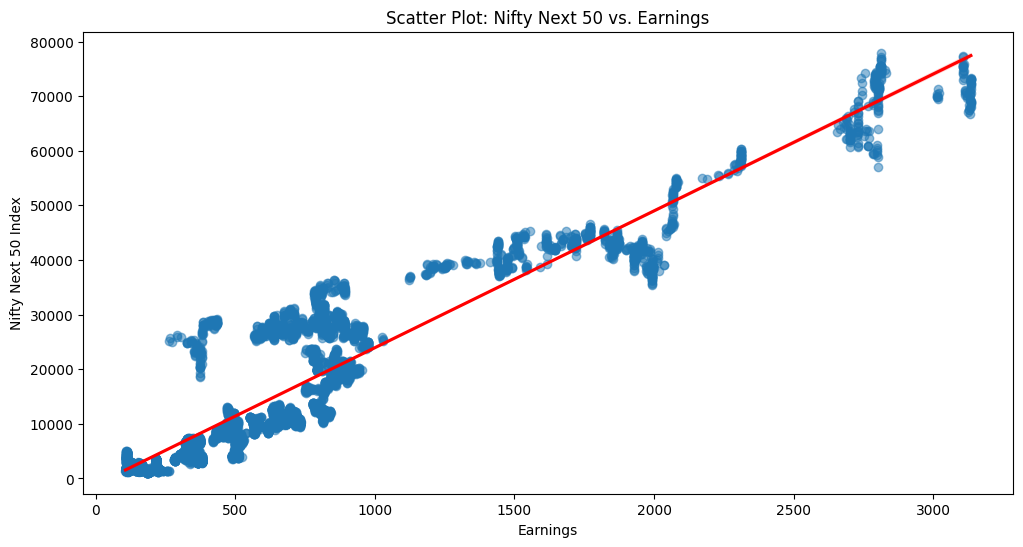

In [10]:
plt.figure(figsize=(12, 6))
sns.regplot(x=df["Earnings"], y=df["Close"], scatter_kws={"alpha": 0.5}, line_kws={"color": "red"})
plt.xlabel("Earnings")
plt.ylabel("Nifty Next 50 Index")
plt.title("Scatter Plot: Nifty Next 50 vs. Earnings")
plt.show()

In [ ]:
# Define quadrants
df["Quadrant"] = "Both Down"  # Default (-,-)
df.loc[(df["Earnings_30d_pct"] > 0) & (df["Close_30d_pct"] > 0), "Quadrant"] = "Both Up"  # (+,+)
df.loc[(df["Earnings_30d_pct"] > 0) & (df["Close_30d_pct"] < 0), "Quadrant"] = "Earnings Up, Index Down"  # (+,-)
df.loc[(df["Earnings_30d_pct"] < 0) & (df["Close_30d_pct"] > 0), "Quadrant"] = "Index Up, Earnings Down"  # (-,+)

# Define colors for each quadrant
quadrant_colors = {
    "Both Up": "green",
    "Both Down": "red",
    "Earnings Up, Index Down": "blue",  # Highlight this one
    "Index Up, Earnings Down": "orange"
}

# Plot scatter plot
plt.figure(figsize=(8, 5))
sns.scatterplot(
    x=df["Earnings_30d_pct"], 
    y=df["Close_30d_pct"], 
    hue=df["Quadrant"], 
    palette=quadrant_colors,
    alpha=0.6
)

# Add quadrant separators
plt.axhline(0, color="black", linestyle="--")
plt.axvline(0, color="black", linestyle="--")

# Count occurrences in each quadrant
quadrant_counts = df["Quadrant"].value_counts()

# Add text labels for counts
for i, (quad, count) in enumerate(quadrant_counts.items()):
    plt.text(
        x=-15, y=15 - (i * 5),  # Adjust position
        s=f"{quad}: {count} days",
        fontsize=10, color="black"
    )

# Labels & title
plt.xlabel("Earnings Monthly % Change")
plt.ylabel("Nifty 50 Monthly % Change")
plt.title("Earnings vs. Index Monthly % Change (Colored by Quadrant)")
plt.legend(title="Quadrant", loc="upper left")
plt.show()

In [12]:
df_datefiltered = df[df["Date"] >= pd.to_datetime("2016-04-01")]
df_datefiltered.shape

(2211, 7)

In [14]:
correlation = df_datefiltered["Close"].corr(df_datefiltered["Earnings"])
print(correlation)

0.9411518791315092


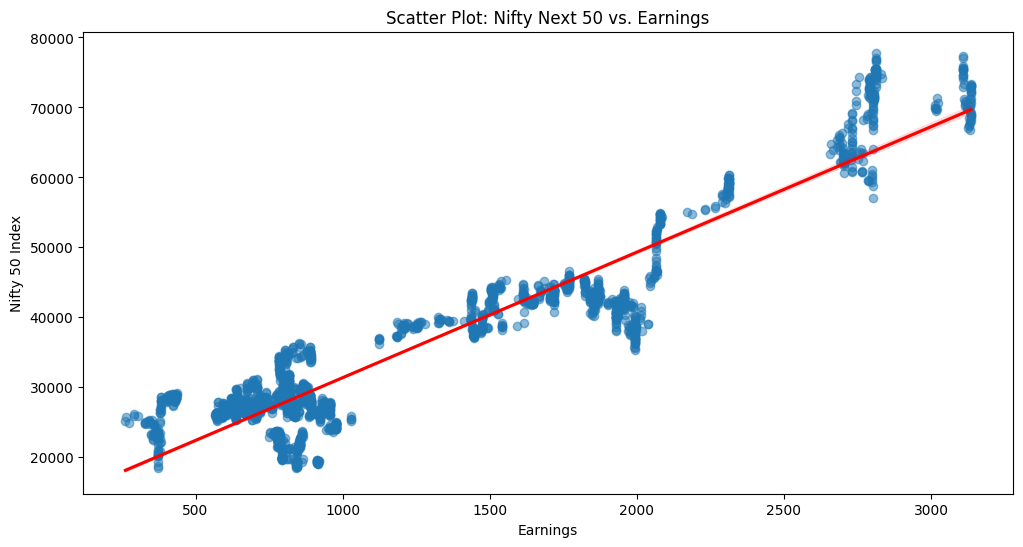

In [16]:
plt.figure(figsize=(12, 6))
sns.regplot(x=df_datefiltered["Earnings"], y=df_datefiltered["Close"], scatter_kws={"alpha": 0.5}, line_kws={"color": "red"})
plt.xlabel("Earnings")
plt.ylabel("Nifty 50 Index")
plt.title("Scatter Plot: Nifty Next 50 vs. Earnings")
plt.show()

C:\Users\sanja\AppData\Local\Temp\ipykernel_12612\703495993.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_datefiltered["Rolling_Corr"] = df_datefiltered["Close"].rolling(252).corr(df_datefiltered["Earnings"])  # 252 = ~1 year


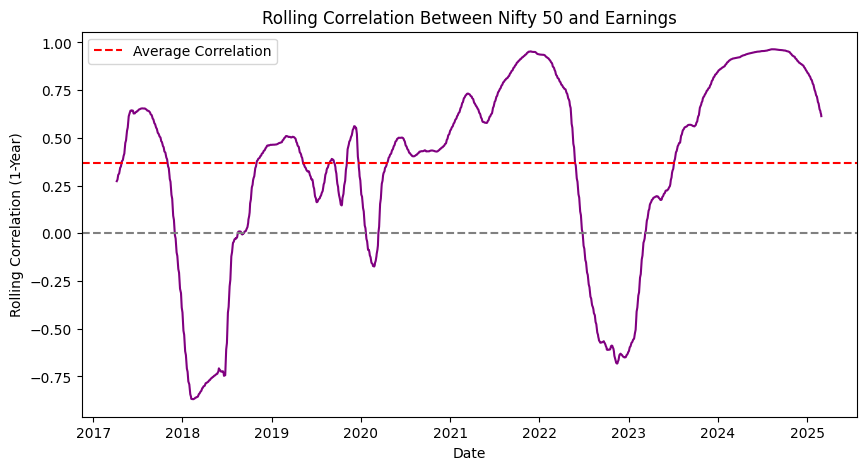

In [18]:
df_datefiltered["Rolling_Corr"] = df_datefiltered["Close"].rolling(252).corr(df_datefiltered["Earnings"])  # 252 = ~1 year

plt.figure(figsize=(10, 5))
plt.plot(df_datefiltered["Date"], df_datefiltered["Rolling_Corr"], color="purple")
plt.axhline(0, linestyle="--", color="gray")
plt.axhline(df_datefiltered["Rolling_Corr"].mean(), linestyle="--", color="red", label="Average Correlation")

plt.xlabel("Date")
plt.ylabel("Rolling Correlation (1-Year)")
plt.title("Rolling Correlation Between Nifty 50 and Earnings")
plt.legend()
plt.show()

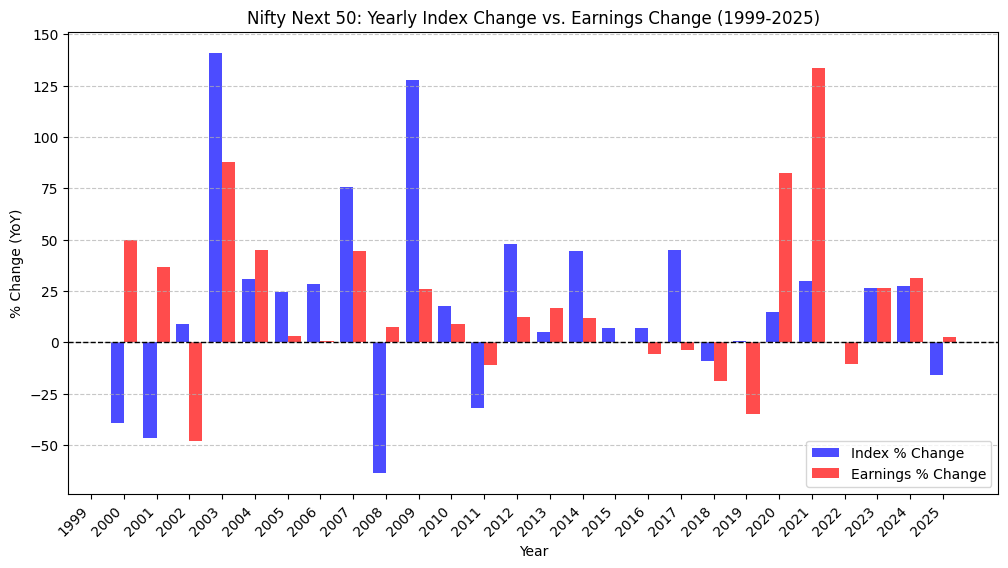

In [9]:
df['Year'] = df['Date'].dt.year
df_yearly = df.groupby('Year').agg({'Close': 'last', 'Earnings': 'last'})

df_yearly['Index_YoY'] = df_yearly['Close'].pct_change() * 100
df_yearly['Earnings_YoY'] = df_yearly['Earnings'].pct_change() * 100

years = df_yearly.index.astype(str)  
index_changes = df_yearly['Index_YoY']
earnings_changes = df_yearly['Earnings_YoY']

x = np.arange(len(years))  
width = 0.4  

fig, ax = plt.subplots(figsize=(12, 6))
bars1 = ax.bar(x - width/2, index_changes, width, label='Index % Change', color='blue', alpha=0.7)
bars2 = ax.bar(x + width/2, earnings_changes, width, label='Earnings % Change', color='red', alpha=0.7)

ax.set_xlabel('Year')
ax.set_ylabel('% Change (YoY)')
ax.set_title('Nifty Next 50: Yearly Index Change vs. Earnings Change (1999-2025)')
ax.set_xticks(x)
ax.set_xticklabels(years, rotation=45, ha='right')
ax.axhline(0, color='black', linestyle='--', linewidth=1)  
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()